In [1]:
import pandas as pd

df = pd.read_csv('Pima_Indians_Diabetes_Database.csv')

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
keys = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

for key in keys:
    df.loc[df[key] <= df[key].quantile(0.05), key]=None
    df.loc[df[key] >= df[key].quantile(0.95), key]=None

In [4]:
features = df[df.keys().drop('Outcome')]
outcome = df['Outcome']

In [5]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_target, test_target = train_test_split(features,outcome,stratify=outcome,random_state=42)

In [6]:
keys = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

for key in keys:
    tmp = train_features[key].median()
    train_features[key].fillna(tmp,inplace=True)
    test_features[key].fillna(tmp,inplace=True)

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_features, train_target)

DecisionTreeClassifier(random_state=42)

In [8]:
y_pred = dt.predict(test_features)

In [9]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

print('Accuracy :',accuracy_score(test_target,y_pred))
print('Precision :',precision_score(test_target,y_pred))
print('Recall :',recall_score(test_target,y_pred))
print('F1 score :',f1_score(test_target,y_pred))

Accuracy : 0.6979166666666666
Precision : 0.5584415584415584
Recall : 0.6417910447761194
F1 score : 0.5972222222222222


In [10]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

In [11]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt, train_features, train_target, cv=5)

In [12]:
print(scores)

[0.61206897 0.67826087 0.67826087 0.64347826 0.71304348]


In [13]:
y_pred = dt.predict(test_features)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [14]:
train_features = train_features.values
train_target = train_target.values.reshape(-1,1)

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

stratifiedkfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
dt = DecisionTreeClassifier(random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
for train_index, test_index in stratifiedkfold.split(train_features, train_target):
    train_feature_fold = train_features[train_index]
    train_target_fold = train_target[train_index]
    
    val_feature_fold = train_features[test_index]
    val_target_fold = train_target[test_index]
    
    dt.fit(train_feature_fold, train_target_fold)
    
    y_pred = dt.predict(val_feature_fold)

    accuracy_scores.append(accuracy_score(val_target_fold,y_pred))
    precision_scores.append(precision_score(val_target_fold,y_pred))
    recall_scores.append(recall_score(val_target_fold,y_pred))
    f1_scores.append(f1_score(val_target_fold,y_pred))
print(accuracy_scores)
print(precision_scores)
print(recall_scores)
print(f1_scores)
    

[0.6206896551724138, 0.7413793103448276, 0.5517241379310345, 0.7413793103448276, 0.6379310344827587, 0.6551724137931034, 0.7192982456140351, 0.7368421052631579, 0.7192982456140351, 0.6491228070175439]
[0.4444444444444444, 0.6086956521739131, 0.38461538461538464, 0.6923076923076923, 0.46153846153846156, 0.5263157894736842, 0.5909090909090909, 0.6086956521739131, 0.5833333333333334, 0.5]
[0.4, 0.7, 0.5, 0.45, 0.3, 0.47619047619047616, 0.65, 0.7, 0.7, 0.55]
[0.4210526315789474, 0.6511627906976744, 0.4347826086956522, 0.5454545454545455, 0.3636363636363637, 0.5, 0.6190476190476191, 0.6511627906976744, 0.6363636363636365, 0.5238095238095238]


In [16]:
y_pred = dt.predict(test_features)

In [17]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

print('Accuracy :',accuracy_score(test_target,y_pred))
print('Precision :',precision_score(test_target,y_pred))
print('Recall :',recall_score(test_target,y_pred))
print('F1 score :',f1_score(test_target,y_pred))

Accuracy : 0.65625
Precision : 0.5076923076923077
Recall : 0.4925373134328358
F1 score : 0.5


In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_target, y_pred)

array([[93, 32],
       [34, 33]])

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_target, y_pred, labels=[1,0])

array([[33, 34],
       [32, 93]])

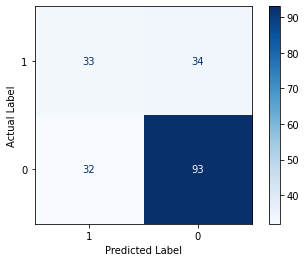

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
matrix = plot_confusion_matrix(dt, test_features, test_target, labels=[1,0], cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

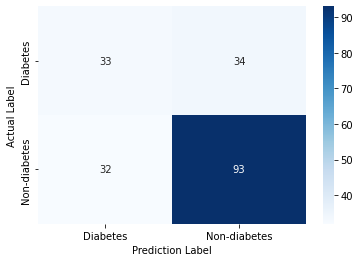

In [21]:
%matplotlib inline

from sklearn.metrics import confusion_matrix
import seaborn as sns

c_matrix = confusion_matrix(test_target, y_pred, labels=[1,0])
ax = sns.heatmap(c_matrix, annot = True, fmt='d',
                xticklabels=['Diabetes', 'Non-diabetes'],
                yticklabels=['Diabetes', 'Non-diabetes'],
                 cmap='Blues')
ax.set_xlabel("Prediction Label")
ax.set_ylabel("Actual Label")
plt.show()

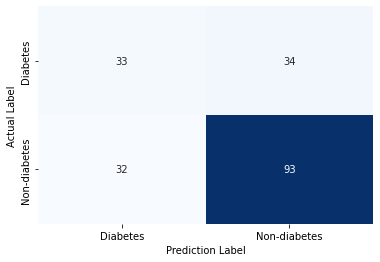

In [22]:
%matplotlib inline

from sklearn.metrics import confusion_matrix
import seaborn as sns

c_matrix = confusion_matrix(test_target, y_pred, labels=[1,0])
ax = sns.heatmap(c_matrix, annot = True, fmt='d',
                xticklabels=['Diabetes', 'Non-diabetes'],
                yticklabels=['Diabetes', 'Non-diabetes'],
                cbar=False, cmap='Blues')
ax.set_xlabel("Prediction Label")
ax.set_ylabel("Actual Label")
plt.show()